# importing the libraries


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv(r'c:\Users\chait\data science course\restaurant_data.csv',encoding='latin-1')

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/2823996011.py:1: DtypeWarning: Columns (5,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

In [3]:
df

,address,name,online_order,book_table,rate,no_of_votes,Mobile,location,rest_type,dish_liked,...,Unnamed: 4149,Unnamed: 4150,Unnamed: 4151,Unnamed: 4152,Unnamed: 4153,Unnamed: 4154,Unnamed: 4155,Unnamed: 4156,Unnamed: 4157,Unnamed: 4158
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,"Cunningham Road, Bangalore",Kettle & Kegs,Yes,No,NaN,0,1.80E+11,Cunningham Road,Delivery,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43997,"36, Vittal Mallya Road, Lavelle Road, Bangalore",Bootlegger,No,No,4.1 /5,1545,+91 8022290099\n+91 8041462747,Lavelle Road,Pub,"Beer, Cocktails, Beef Steak, Beef Chilli, Nach...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43998,"L1-08 Skywalk, 5/1, Near Body Craft, Assaye Ro...",The Souk,Yes,No,3.7 /5,66,+91 9846709999,Ulsoor,Cafe,"Mediterranean Platter, Brownie, Pasta, Burgers...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43999,"145, 8th Main Road, Vasanth Nagar, Bangalore",Donne Biryani Hatti,Yes,No,3.6 /5,28,+91 9916108575,Vasanth Nagar,Quick Bites,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data cleaning

In [4]:
df.columns[0:16]

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'no_of_votes',
       'Mobile', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df=df[['address', 'name', 'online_order', 'book_table', 'rate', 'no_of_votes',
       'Mobile', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)']]

In [6]:
df

,address,name,online_order,book_table,rate,no_of_votes,Mobile,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",?800.00,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",?800.00,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",?800.00,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",?300.00,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",?600.00,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,"Cunningham Road, Bangalore",Kettle & Kegs,Yes,No,NaN,0,1.80E+11,Cunningham Road,Delivery,NaN,"Tea, Beverages",?200.00,"[('Rated 1.0', 'RATED\n Super unprofessional!...",[],Delivery,Lavelle Road
43997,"36, Vittal Mallya Road, Lavelle Road, Bangalore",Bootlegger,No,No,4.1 /5,1545,+91 8022290099\n+91 8041462747,Lavelle Road,Pub,"Beer, Cocktails, Beef Steak, Beef Chilli, Nach...","Continental, Steak","?1,200.00","[('Rated 2.0', 'RATED\n Bootlegger is undoubt...",[],Delivery,Lavelle Road
43998,"L1-08 Skywalk, 5/1, Near Body Craft, Assaye Ro...",The Souk,Yes,No,3.7 /5,66,+91 9846709999,Ulsoor,Cafe,"Mediterranean Platter, Brownie, Pasta, Burgers...","Cafe, Mediterranean, Italian, Pizza, Continental",?800.00,"[('Rated 3.0', 'RATED\n A small space, with a...",[],Delivery,Lavelle Road
43999,"145, 8th Main Road, Vasanth Nagar, Bangalore",Donne Biryani Hatti,Yes,No,3.6 /5,28,+91 9916108575,Vasanth Nagar,Quick Bites,NaN,Biryani,?300.00,"[('Rated 1.0', 'RATED\n I never got the order...",[],Delivery,Lavelle Road


In [7]:
fdf=df[(df.online_order=='No') | (df.online_order=='Yes')]

In [8]:
fdf['listed_in(type)'].value_counts()

Delivery              18660
Dine-out              11552
Desserts               2415
Cafes                  1141
Buffet                  516
Drinks & nightlife      488
Pubs and bars           353
Name: listed_in(type), dtype: int64

In [9]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38064 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38064 non-null  object
 1   name                         38064 non-null  object
 2   online_order                 38064 non-null  object
 3   book_table                   38064 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38064 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    37899 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38064 non-null  object
 13  menu_item                    35

In [10]:
fdf[fdf['location'].isnull()]

,address,name,online_order,book_table,rate,no_of_votes,Mobile,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1782,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
11068,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,BTM
15507,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Mohabbat Desi Restaurant,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Electronic City
18443,"Kudlu Gate, Bommanahalli, Bangalore",Desi Chatkara,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,HSR
29960,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Kammanahalli
30069,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 4th Block
31422,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 4th Block
32521,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Koramangala 4th Block
33348,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 5th Block
34870,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 5th Block


In [11]:
pdf=fdf[fdf['location'].isnull()==False]

In [12]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38050 non-null  object
 1   name                         38050 non-null  object
 2   online_order                 38050 non-null  object
 3   book_table                   38050 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38050 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    37899 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38050 non-null  object
 13  menu_item                    35

In [13]:
pdf.menu_item.fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/223148818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf.menu_item.fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)


In [14]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38050 non-null  object
 1   name                         38050 non-null  object
 2   online_order                 38050 non-null  object
 3   book_table                   38050 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38050 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    37899 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38050 non-null  object
 13  menu_item                    38

In [15]:
pdf.menu_item.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [16]:
pdf['menu_item'] = pdf.menu_item.replace('[]', 'Not_available')

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/3616443839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['menu_item'] = pdf.menu_item.replace('[]', 'Not_available')


In [17]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38050 non-null  object
 1   name                         38050 non-null  object
 2   online_order                 38050 non-null  object
 3   book_table                   38050 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38050 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    37899 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38050 non-null  object
 13  menu_item                    38

In [18]:
pdf['listed_in(type)'].fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/4250046893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['listed_in(type)'].fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)


In [19]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38050 non-null  object
 1   name                         38050 non-null  object
 2   online_order                 38050 non-null  object
 3   book_table                   38050 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38050 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    37899 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38050 non-null  object
 13  menu_item                    38

In [20]:
pdf['listed_in(city)'].fillna(value=pdf['location'], method=None, axis=None, inplace=True, limit=None, downcast=None)

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/3305086672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['listed_in(city)'].fillna(value=pdf['location'], method=None, axis=None, inplace=True, limit=None, downcast=None)


In [21]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38050 non-null  object
 1   name                         38050 non-null  object
 2   online_order                 38050 non-null  object
 3   book_table                   38050 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38050 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    37899 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38050 non-null  object
 13  menu_item                    38

In [22]:
pdf.head()

,address,name,online_order,book_table,rate,no_of_votes,Mobile,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",?800.00,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Not_available,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",?800.00,"[('Rated 4.0', 'RATED\n Had been here for din...",Not_available,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",?800.00,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Not_available,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",?300.00,"[('Rated 4.0', ""RATED\n Great food and proper...",Not_available,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",?600.00,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Not_available,Buffet,Banashankari


In [23]:
pdf['rest_type'].fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/3576948594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['rest_type'].fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)


In [24]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      38050 non-null  object
 1   name                         38050 non-null  object
 2   online_order                 38050 non-null  object
 3   book_table                   38050 non-null  object
 4   rate                         32433 non-null  object
 5   no_of_votes                  38050 non-null  object
 6   Mobile                       37246 non-null  object
 7   location                     38050 non-null  object
 8   rest_type                    38050 non-null  object
 9   dish_liked                   17381 non-null  object
 10  cuisines                     38035 non-null  object
 11  approx_cost(for two people)  37859 non-null  object
 12  reviews_list                 38050 non-null  object
 13  menu_item                    38

In [ ]:
temp=pdf[pdf['approx_cost(for two people)'].isnull()==False]

In [ ]:
temp['approx_cost(for two people)']

In [ ]:
pdf['menu_item'] = pdf.menu_item.replace('?', 0)

In [ ]:
pdf['approx_cost(for two people)'].unique()

In [26]:
pdf['cost_two_people']=pdf['approx_cost(for two people)']

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/120561877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['cost_two_people']=pdf['approx_cost(for two people)']


In [27]:
pdf['cost_two_people']=pdf['cost_two_people'].str.replace('?','')

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/4114104167.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pdf['cost_two_people']=pdf['cost_two_people'].str.replace('?','')
C:\Users\chait\AppData\Local\Temp/ipykernel_1752/4114104167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['cost_two_people']=pdf['cost_two_people'].str.replace('?','')


In [28]:
pdf['cost_two_people'].unique()

array(['800.00', '300.00', '600.00', '700.00', '550.00', '500.00',
       '450.00', '650.00', '400.00', '900.00', '200.00', '750.00',
       '150.00', '850.00', '100.00', '1,200.00', '350.00', '250.00',
       '950.00', '1,000.00', '1,500.00', '1,300.00', '199.00', '80.00',
       '1,100.00', '160.00', '1,600.00', '230.00', '130.00', '50.00',
       '190.00', '1,700.00', nan, '1,400.00', '180.00', '1,350.00',
       '2,200.00', '2,000.00', '1,800.00', '1,900.00', '330.00',
       '2,500.00', '2,100.00', '3,000.00', '2,800.00', '3,400.00',
       '40.00', '1,250.00', '3,500.00', '4,000.00', '2,400.00',
       '2,600.00', '120.00', '1,450.00', '469.00', '70.00', '3,200.00',
       '60.00', '560.00', '240.00', '360.00', '6,000.00', '1,050.00',
       '2,300.00', '4,100.00'], dtype=object)

In [30]:
temp=pdf[pdf['cost_two_people'].isnull()==False]

In [40]:
pdf['cost_two_people']=pdf['cost_two_people'].str.replace(',','')

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/3222462321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['cost_two_people']=pdf['cost_two_people'].str.replace(',','')


In [39]:
meanval=temp['cost_two_people'].astype(float).mean()

In [41]:
pdf['cost_two_people'].fillna(value=meanval, method=None, axis=None, inplace=True, limit=None, downcast=None)

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/432980607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['cost_two_people'].fillna(value=meanval, method=None, axis=None, inplace=True, limit=None, downcast=None)


In [48]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   address          38050 non-null  object
 1   name             38050 non-null  object
 2   online_order     38050 non-null  object
 3   book_table       38050 non-null  object
 4   rate             32433 non-null  object
 5   no_of_votes      38050 non-null  object
 6   Mobile           37246 non-null  object
 7   location         38050 non-null  object
 8   rest_type        38050 non-null  object
 9   dish_liked       17381 non-null  object
 10  cuisines         38035 non-null  object
 11  cost_two_people  38050 non-null  object
 12  reviews_list     38050 non-null  object
 13  menu_item        38050 non-null  object
 14  listed_in(type)  38050 non-null  object
 15  listed_in(city)  38050 non-null  object
dtypes: object(16)
memory usage: 4.9+ MB


In [45]:
pdf=pdf[['address', 'name', 'online_order', 'book_table', 'rate', 'no_of_votes',
       'Mobile', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_two_people', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)']]

In [49]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   address          38050 non-null  object
 1   name             38050 non-null  object
 2   online_order     38050 non-null  object
 3   book_table       38050 non-null  object
 4   rate             32433 non-null  object
 5   no_of_votes      38050 non-null  object
 6   Mobile           37246 non-null  object
 7   location         38050 non-null  object
 8   rest_type        38050 non-null  object
 9   dish_liked       17381 non-null  object
 10  cuisines         38035 non-null  object
 11  cost_two_people  38050 non-null  object
 12  reviews_list     38050 non-null  object
 13  menu_item        38050 non-null  object
 14  listed_in(type)  38050 non-null  object
 15  listed_in(city)  38050 non-null  object
dtypes: object(16)
memory usage: 4.9+ MB


In [58]:
pdf['rate']=pdf['rate'].str.replace('/5','')
pdf['rate']=pdf['rate'].str.replace('-','5')

In [59]:
pdf['rate']=pdf['rate'].astype(float)

In [61]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          38050 non-null  object 
 1   name             38050 non-null  object 
 2   online_order     38050 non-null  object 
 3   book_table       38050 non-null  object 
 4   rate             32433 non-null  float64
 5   no_of_votes      38050 non-null  object 
 6   Mobile           37246 non-null  object 
 7   location         38050 non-null  object 
 8   rest_type        38050 non-null  object 
 9   dish_liked       17381 non-null  object 
 10  cuisines         38035 non-null  object 
 11  cost_two_people  38050 non-null  object 
 12  reviews_list     38050 non-null  object 
 13  menu_item        38050 non-null  object 
 14  listed_in(type)  38050 non-null  object 
 15  listed_in(city)  38050 non-null  object 
dtypes: float64(1), object(15)
memory usage: 4.9+ MB


In [62]:
pdf['rate'].fillna(value=pdf.rate.mean(), method=None, axis=None, inplace=True, limit=None, downcast=None)

In [63]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          38050 non-null  object 
 1   name             38050 non-null  object 
 2   online_order     38050 non-null  object 
 3   book_table       38050 non-null  object 
 4   rate             38050 non-null  float64
 5   no_of_votes      38050 non-null  object 
 6   Mobile           37246 non-null  object 
 7   location         38050 non-null  object 
 8   rest_type        38050 non-null  object 
 9   dish_liked       17381 non-null  object 
 10  cuisines         38035 non-null  object 
 11  cost_two_people  38050 non-null  object 
 12  reviews_list     38050 non-null  object 
 13  menu_item        38050 non-null  object 
 14  listed_in(type)  38050 non-null  object 
 15  listed_in(city)  38050 non-null  object 
dtypes: float64(1), object(15)
memory usage: 4.9+ MB


In [64]:
pdf.cuisines.fillna(value='Not_available', method=None, axis=None, inplace=True, limit=None, downcast=None)

In [66]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          38050 non-null  object 
 1   name             38050 non-null  object 
 2   online_order     38050 non-null  object 
 3   book_table       38050 non-null  object 
 4   rate             38050 non-null  float64
 5   no_of_votes      38050 non-null  object 
 6   Mobile           37246 non-null  object 
 7   location         38050 non-null  object 
 8   rest_type        38050 non-null  object 
 9   dish_liked       17381 non-null  object 
 10  cuisines         38050 non-null  object 
 11  cost_two_people  38050 non-null  object 
 12  reviews_list     38050 non-null  object 
 13  menu_item        38050 non-null  object 
 14  listed_in(type)  38050 non-null  object 
 15  listed_in(city)  38050 non-null  object 
dtypes: float64(1), object(15)
memory usage: 4.9+ MB


In [67]:
pdf.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'no_of_votes',
       'Mobile', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_two_people', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [68]:
pdf=pdf[['address', 'name', 'online_order', 'book_table', 'rate', 'no_of_votes', 'location', 'rest_type', 'cuisines',
       'cost_two_people', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)']]

In [69]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38050 entries, 0 to 44000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          38050 non-null  object 
 1   name             38050 non-null  object 
 2   online_order     38050 non-null  object 
 3   book_table       38050 non-null  object 
 4   rate             38050 non-null  float64
 5   no_of_votes      38050 non-null  object 
 6   location         38050 non-null  object 
 7   rest_type        38050 non-null  object 
 8   cuisines         38050 non-null  object 
 9   cost_two_people  38050 non-null  object 
 10  reviews_list     38050 non-null  object 
 11  menu_item        38050 non-null  object 
 12  listed_in(type)  38050 non-null  object 
 13  listed_in(city)  38050 non-null  object 
dtypes: float64(1), object(13)
memory usage: 4.4+ MB


In [72]:
pdf.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'no_of_votes',
       'location', 'rest_type', 'cuisines', 'cost_two_people', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [73]:
pdf.drop(['address','location','reviews_list','menu_item'],axis=1,inplace=True)


C:\Users\chait\AppData\Local\Temp/ipykernel_1752/2276797885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf.drop(['address','location','reviews_list','menu_item'],axis=1,inplace=True)


In [74]:
pdf.columns

Index(['name', 'online_order', 'book_table', 'rate', 'no_of_votes',
       'rest_type', 'cuisines', 'cost_two_people', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [75]:
sum(pdf.duplicated())

1320

In [76]:
pdf=pdf.drop_duplicates()

In [79]:
pdf

,name,online_order,book_table,rate,no_of_votes,rest_type,cuisines,cost_two_people,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
43996,Kettle & Kegs,Yes,No,3.780011,0,Delivery,"Tea, Beverages",200.0,Delivery,Lavelle Road
43997,Bootlegger,No,No,4.100000,1545,Pub,"Continental, Steak",1200.0,Delivery,Lavelle Road
43998,The Souk,Yes,No,3.700000,66,Cafe,"Cafe, Mediterranean, Italian, Pizza, Continental",800.0,Delivery,Lavelle Road
43999,Donne Biryani Hatti,Yes,No,3.600000,28,Quick Bites,Biryani,300.0,Delivery,Lavelle Road


In [81]:
pdf=pdf[pdf['rate']<5]

In [87]:
pdf['no_of_votes']=pdf['no_of_votes'].astype(int)

C:\Users\chait\AppData\Local\Temp/ipykernel_1752/247978342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['no_of_votes']=pdf['no_of_votes'].astype(int)


In [89]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34842 entries, 0 to 44000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             34842 non-null  object 
 1   online_order     34842 non-null  object 
 2   book_table       34842 non-null  object 
 3   rate             34842 non-null  float64
 4   no_of_votes      34842 non-null  int32  
 5   rest_type        34842 non-null  object 
 6   cuisines         34842 non-null  object 
 7   cost_two_people  34842 non-null  float64
 8   listed_in(type)  34842 non-null  object 
 9   listed_in(city)  34842 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 2.8+ MB


# How many restaurants are accepting online orders?

Yes    21675
No     13167
Name: online_order, dtype: int64


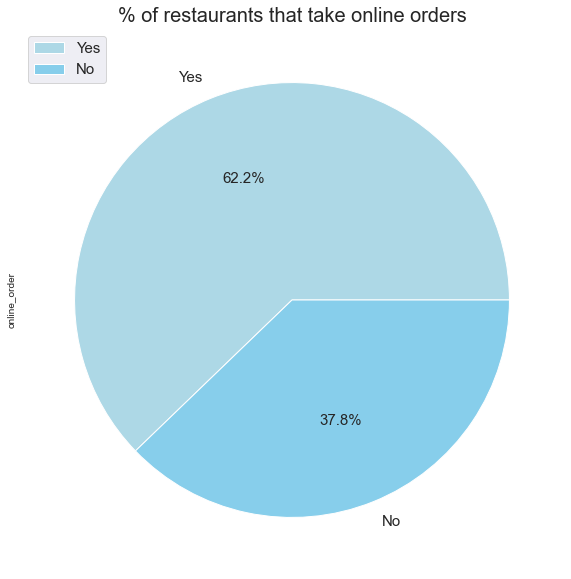

In [92]:
print(pdf['online_order'].value_counts())
plt.figure(figsize=(30,10))
pdf['online_order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.legend(loc=2, prop={'size': 15})

# number of restaurants accepting table bookings

No     30917
Yes     3925
Name: book_table, dtype: int64


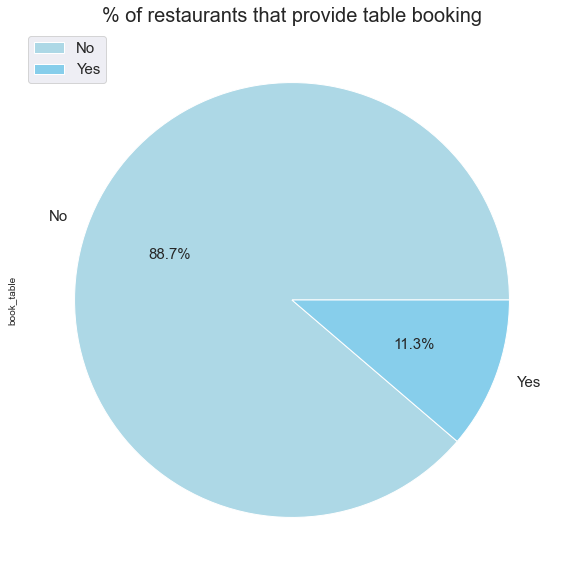

In [96]:
print(pdf['book_table'].value_counts())
plt.figure(figsize=(30,10))
pdf['book_table'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking',size=20)

plt.legend(loc=2, prop={'size': 15})

# average 4+ ratings, table bookings have less ratings when compared with the other

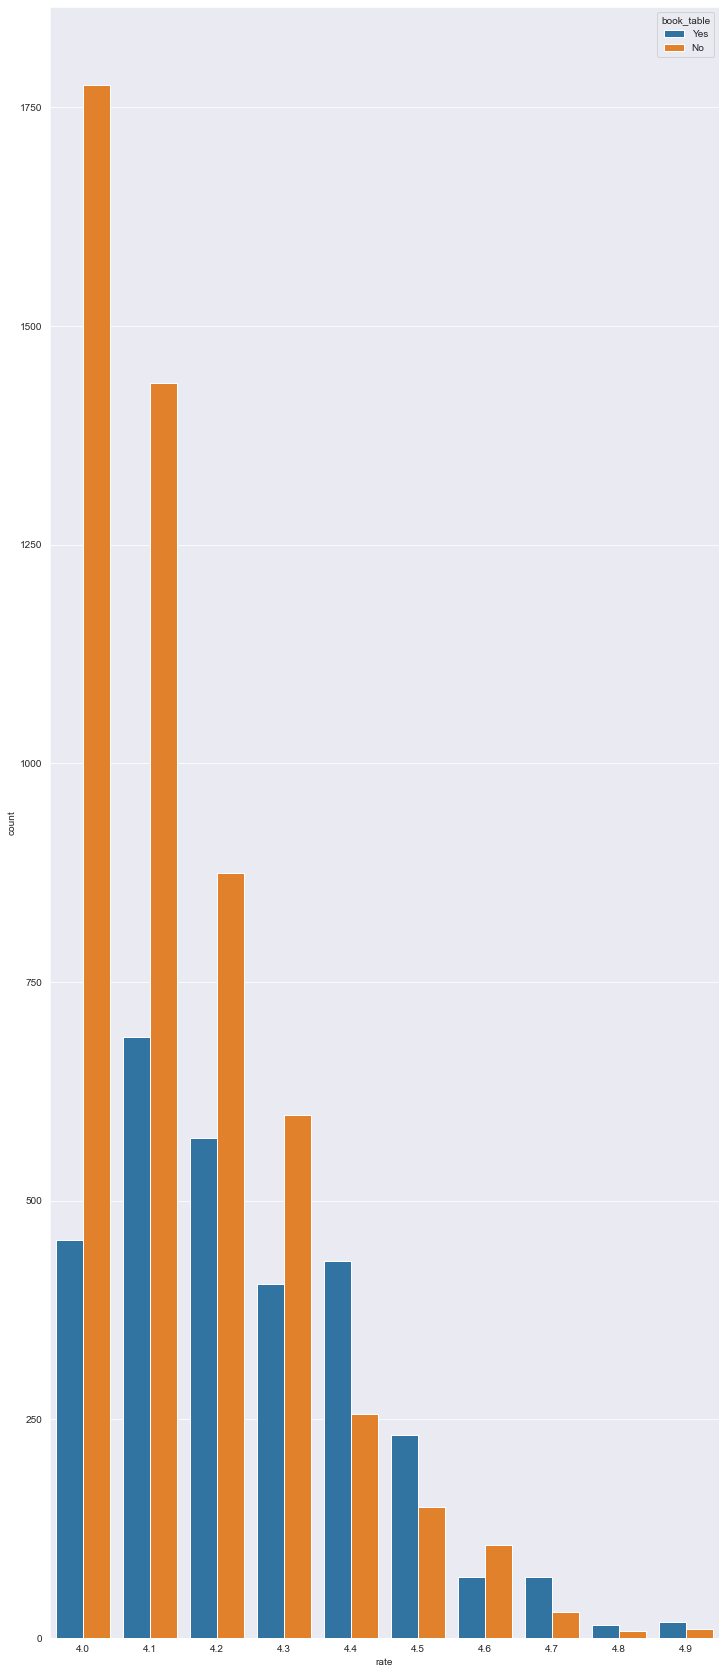

In [107]:
plt.figure(figsize=(12,30))
sns.countplot(data=pdf[pdf['rate']>=4],x='rate',hue='book_table');

# average cost of two people in city , BTM hols second place while kormangala 5th block wholds first place

<AxesSubplot:title={'center':'most sales at locations'}, xlabel='listed_in(city)'>

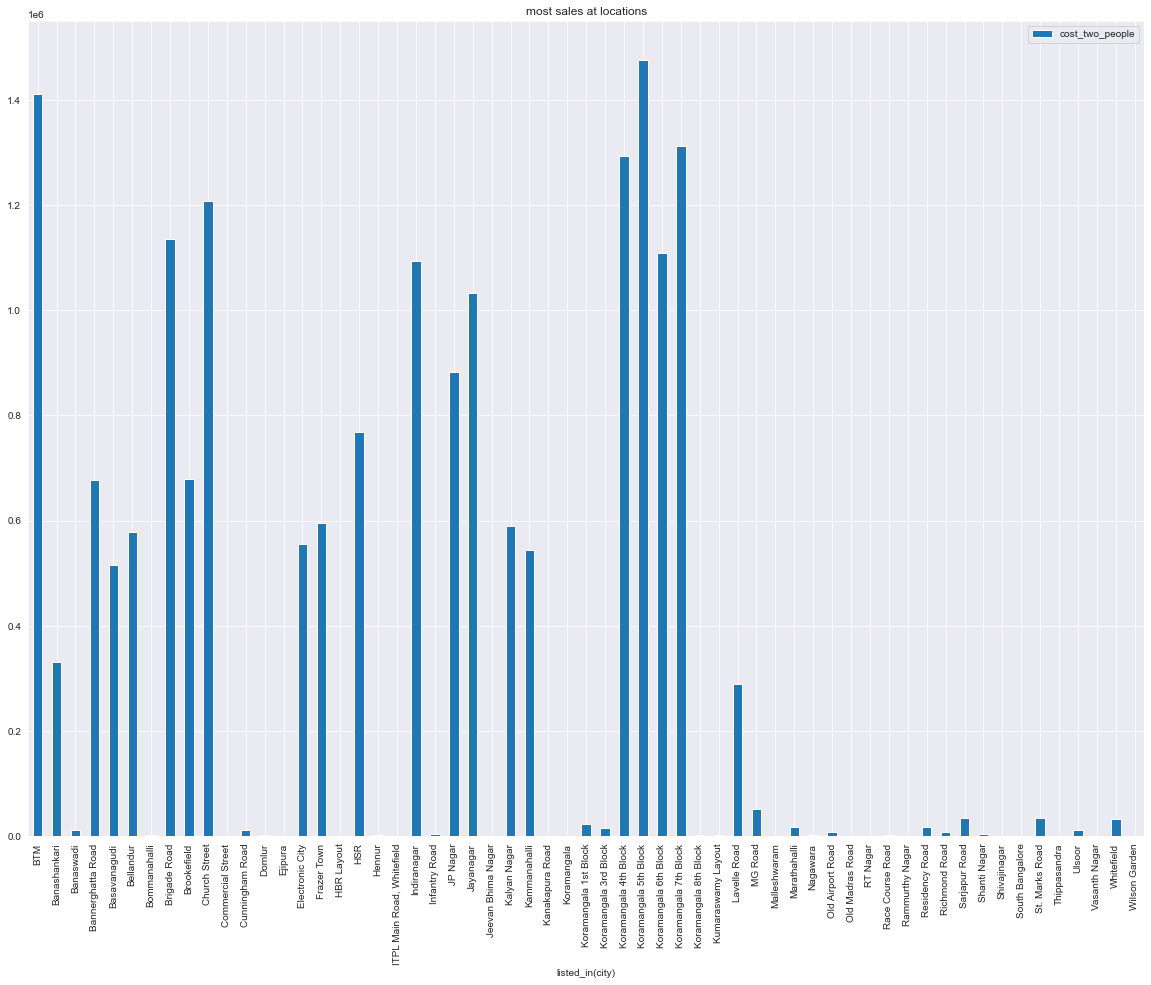

In [113]:
pd.DataFrame(pdf.groupby('listed_in(city)')['cost_two_people'].sum()).plot(kind='bar', title='most sales at locations', figsize=(20, 15))

# BTM has most

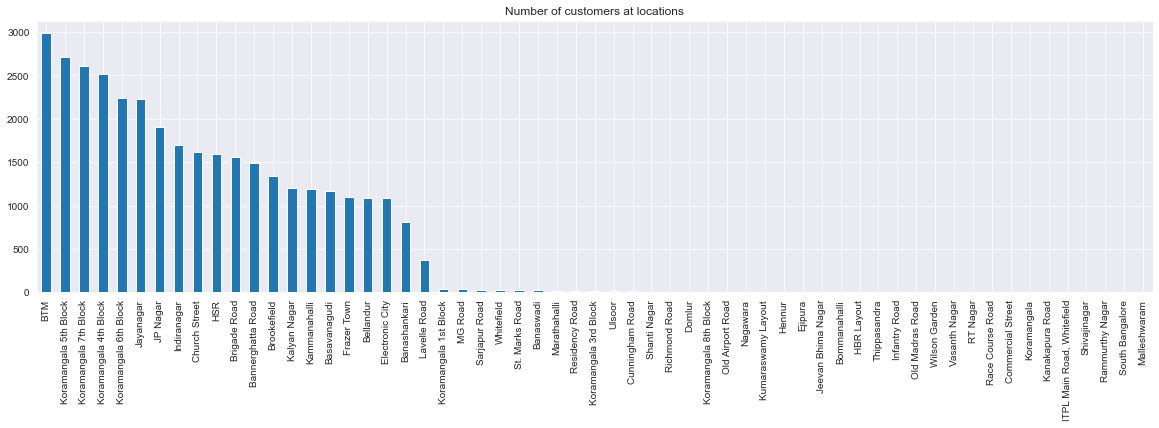

In [115]:
pdf['listed_in(city)'].value_counts().plot(kind='bar', title='Number of customers at locations', figsize=(20, 5));

In [116]:
pdf.head()

,name,online_order,book_table,rate,no_of_votes,rest_type,cuisines,cost_two_people,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


C:\Users\chait\AppData\Local\Temp/ipykernel_1752/2618155709.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(pdf.groupby('online_order')['cost_two_people','rate'].sum()).plot(kind='bar', title='most sales at locations', figsize=(20, 15))


<AxesSubplot:title={'center':'most sales at locations'}, xlabel='online_order'>

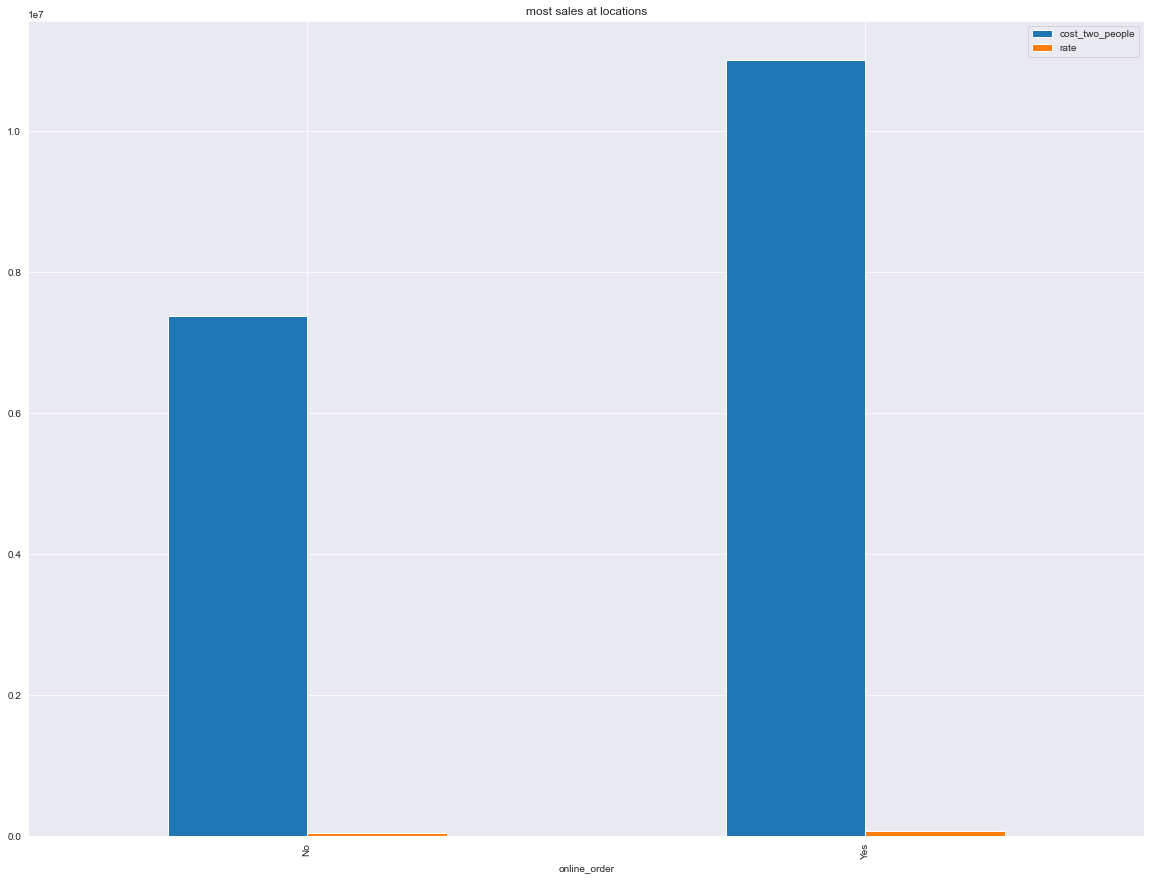

In [117]:
pd.DataFrame(pdf.groupby('online_order')['cost_two_people','rate'].sum()).plot(kind='bar', title='most sales at locations', figsize=(20, 15))

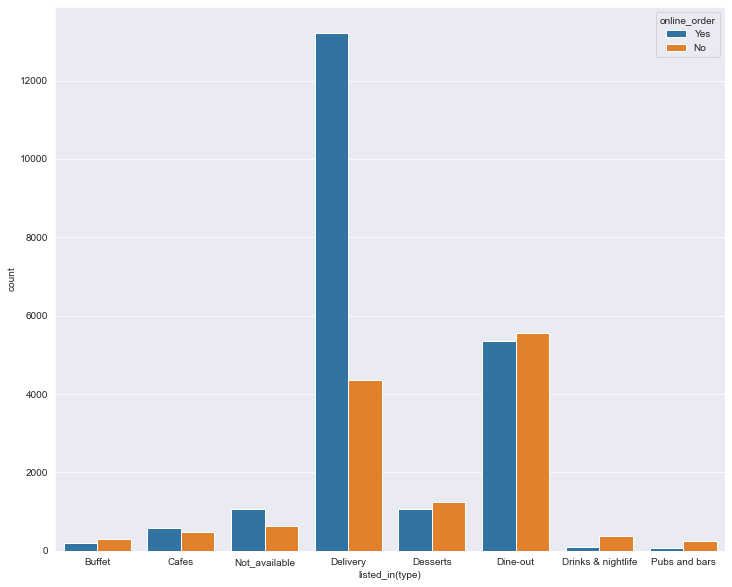

In [120]:
plt.figure(figsize=(12,10))
sns.countplot(data=pdf,x='listed_in(type)',hue='online_order');

In [130]:
b=pdf.groupby('cuisines')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)
print(b.head(5))

                                               cuisines  rate
179                         Asian, Chinese, Thai, Momos   4.9
197             Asian, Mediterranean, North Indian, BBQ   4.9
982   Continental, North Indian, Italian, South Indi...   4.9
973   Continental, North Indian, Chinese, European, ...   4.8
1742         North Indian, European, Mediterranean, BBQ   4.8


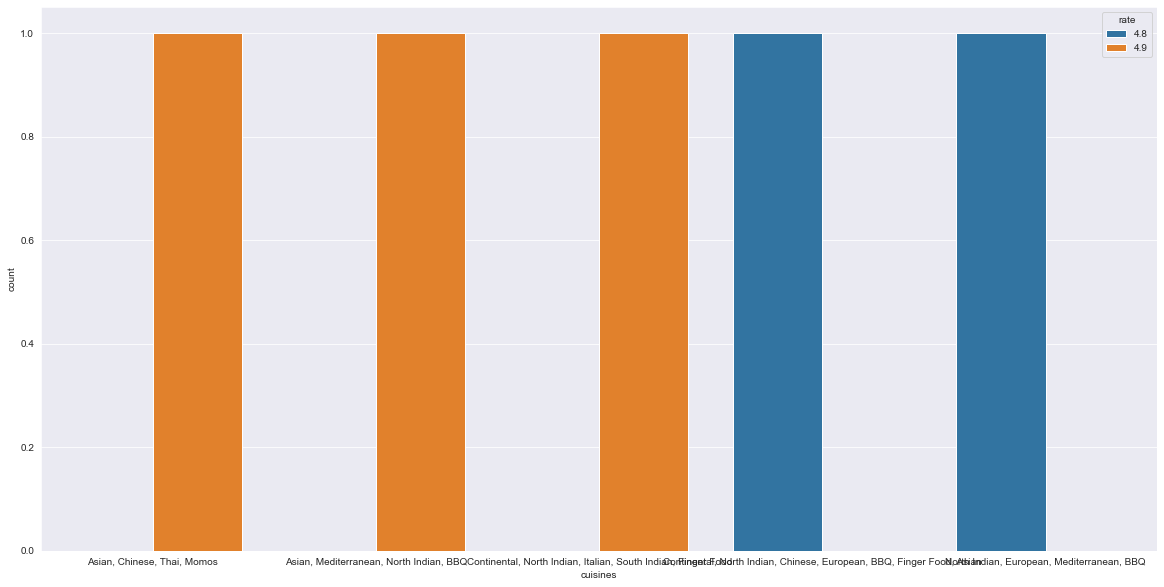

In [132]:
plt.figure(figsize=(20,10))
sns.countplot(data=b.head(5),x='cuisines',hue='rate');

      listed_in(type)  cost_two_people
3            Desserts       376.285119
2            Delivery       445.597759
4            Dine-out       533.529188
1               Cafes       610.438071
6       Not_available       908.521202
7       Pubs and bars      1259.700490
0              Buffet      1264.273607
5  Drinks & nightlife      1370.238034


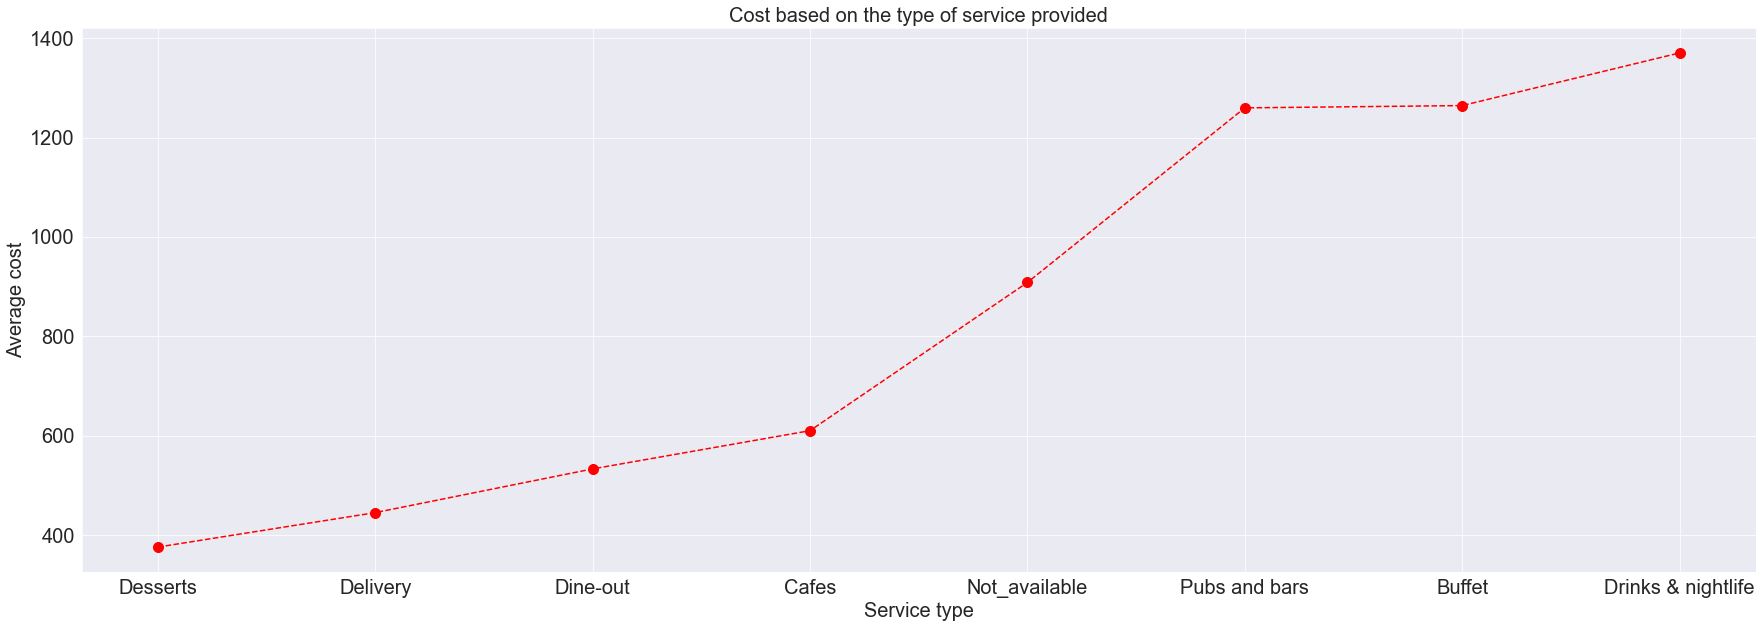

In [134]:
d=pdf.groupby('listed_in(type)')['cost_two_people'].mean().reset_index().sort_values(by='cost_two_people')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['listed_in(type)'],d['cost_two_people'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)

plt.show()